<div style="border:solid green 2px; padding: 20px">
    
<b>Данила, привет!</b> Мы рады тебя видеть на территории код-ревьюеров. Ты проделал большую работу над проектом, но давай познакомимся и сделаем его еще лучше! У нас тут своя атмосфера и несколько правил:


1. Меня зовут Александр Матвеевский. Я работаю код-ревьюером, моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать аналитиком данных.
2. Общаемся на ты.
3. Если хочешь написать, спросить - не нужно стесняться. Только выбери свой цвет для комментария.  
4. Это учебный проект, тут можно не бояться сделать ошибку.  
5. У тебя неограниченное количество попыток для сдачи проекта.  
6. Let's Go!

---

Я буду красить комментарии цветом, пожалуйста, не удаляй их:

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Такой комментарий нужно исправить обязательно, он критически влияет на удачное выполнение проекта.
</div>
    
---

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__


Такой комментарий является рекомендацией или советом. Можешь использовать их на своё усмотрение.
</div>

---

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Такой комментарий  говорит о том, что было сделано что-то качественное и правильное =)
</div>
    
---
    
Предлагаю работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комментарии — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:   
    
<div class="alert alert-info"> <b>Комментарии студента:</b> Например, вот так.</div>
    
Всё это поможет выполнить повторную проверку твоего проекта оперативнее. Если будут какие-нибудь вопросы по моим комментариям, пиши, будем разбираться вместе :)    
    
---

# Аналитический кейс развлекательного приложения Procrastinate Pro+ 

Передо мною - маркетинговым аналитиком развлекательного приложения "Procrastinate Pro+" стоят следующие задачи: анализ рекламы приложения, выявление основных причин убытков, предложение по улучшению работы. Конечная цель - вывод компании в плюс. 

Работа будет осуществляться следующими этапами:
1. Извлечение и обработка данных.
2. Построение функций для расчёта и анализа LTV, ROI, удержания и конверсии.
3. Исследовательский анализ данных.
4. Анализ маркетинга.
5. Оценка окупаемости рекламы.
6. Общий вывод

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__


Отличная практика - расписывать цель и основные этапы своими словами (этот навык очень поможет на фильнальном проекте). 
</div>

### Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

In [1]:
import pandas as pd
from datetime import datetime, timedelta
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [2]:
sessions=pd.read_csv('/datasets/visits_info_short.csv')
orders=pd.read_csv('/datasets/orders_info_short.csv')
ad_costs=pd.read_csv('/datasets/costs_info_short.csv')

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__
        
Для подгрузки данных можно использовать конструкцию `try-except`, она поможет избежать потенциальных ошибок при загрузке данных, связанных, например, с некорректным указанием путей.
        
Подробнее о конструкции по ссылке:
        
https://pythonworld.ru/tipy-dannyx-v-python/isklyucheniya-v-python-konstrukciya-try-except-dlya-obrabotki-isklyuchenij.html
        
Либо же можно использовать стандартную библиотеку os:
        
https://pythonworld.ru/moduli/modul-os.html

    
Несколько интересных статей кейсы использования конструкции:
    
https://www.programiz.com/python-programming/exception-handling
    
https://towardsdatascience.com/do-not-abuse-try-except-in-python-d9b8ee59e23b
    
https://www.techbeamers.com/use-try-except-python/
        
Как вариант в try можно указать корректные пути (в нашем случае глобальные) в except - некорректные (локальные). Можно также специфицровать тип ошибки, FileNotFoundError или задать кастомный тип ошибки (FilePathError, например)
        
Она полезна, если ты работаешь локально, а потом подгружаешь проект на платформу. Конструкция позволит не падать коду и локально, и на сервере ЯП, так как если не сработает один блок с путями, сработает другой.
        
Ну и вообще, в целом полезно про эту констуркцию знать, она универсальна и может быть использована в разных задачах.

#### Проверим таблицу visits 

In [3]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [4]:
sessions.duplicated().sum()

0

In [5]:
sessions.columns=sessions.columns.str.lower()

In [6]:
sessions.rename(columns = {'user id':'user_id', 'session start':'session_start', 'session end':'session_end'}, inplace = True )

In [7]:
sessions.head()

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [8]:
sessions['session_start']=pd.to_datetime(sessions['session_start'])
sessions['session_end']=pd.to_datetime(sessions['session_end'])

In [9]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [10]:
sessions.isna().sum()

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

Пропусков и дубликатов нет. Типы колонок изменены

#### Проверим таблицу orders 

In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [12]:
orders.duplicated().sum()

0

In [13]:
orders.columns=orders.columns.str.lower()

In [14]:
orders.rename(columns = {'user id':'user_id', 'event dt':'event_dt'}, inplace = True )

In [15]:
orders.head()

,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [16]:
orders['event_dt']=pd.to_datetime(orders['event_dt'])

In [17]:
orders.isna().sum()

user_id     0
event_dt    0
revenue     0
dtype: int64

In [18]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


Пропусков и дубликатов нет. Типы колонок изменены

#### Проверим таблицу costs 

In [19]:
ad_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [20]:
ad_costs.duplicated().sum()

0

In [21]:
ad_costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [22]:
ad_costs.columns=ad_costs.columns.str.lower()

In [23]:
ad_costs['dt']=pd.to_datetime(ad_costs['dt']).dt.date

In [24]:
ad_costs.isna().sum()

dt         0
channel    0
costs      0
dtype: int64

In [25]:
ad_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Пропусков и дубликатов нет. Типы колонок изменены

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

    
Хорошо, основные действия по предобработке сделаны, здорово, что ты не забыл проверить данные на наличие дубликатов.
</div>

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__


* если мы только привели преобразование в строчные символы и заменили пробел на знак `_`, то мы можем использовать такой подход:
    
`visits.columns = visits.columns.str.lower().str.replace(' ', '_')`

также интересным является подход с использованием list comprehensions:
        
`visits.columns = [x.lower().replace(' ', '_') for x in visits.columns.values]`
    
* на стадии загрузки и подготовки данных к исследовательскому анализу, советую посмотреть на данные более детально, чтобы избежать невынужденных ошибок в дальнейшем. Чем большем мы знаем о данных - тем более корректны и обоснованы выглядят наши выводы. Такие проверки много времени не занимают, но зато мы можем лучше контролировать данные и их анализ. Например, мы можем:
    - проверить временной интервал на соответствие условию проекта, а также на возможные ошибки (например, проверить случаи, когда окончание сессии было раньше, и так далее);
    - для численных данных посмотреть на их статистические показатели и проверить их на наличие каких-то ошибок или аномалий (например, нули или отрицательные значения там, где они не должны быть).

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

#### Функции для метрик

In [26]:
def get_profiles(sessions, orders, ad_costs, events=None, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [27]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [28]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [29]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

#### Функции для графиков

In [30]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [31]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [32]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [33]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

Функции заданы.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__
    
Хорошо, все необходимые функции были заданы, можно приступать к расчета и анализу👀

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

#### Профили пользователей. Максимальная и минимальная дата привлечения

In [34]:
profiles=get_profiles(sessions, orders, ad_costs)

profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [35]:
min_date=min(profiles['dt'])
max_date=max(profiles['dt'])

In [36]:
print(min_date)

2019-05-01


In [37]:
print(max_date)

2019-10-27


Вывод: самая ранняя дата:  1 мая 2019 года, самая поздняя дата: 27 октября 2019 года. 

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Неплохо бы проверить даты на соответствие ТЗ
</div>

<div class="alert alert-info"> <b>Комментарии студента:</b>Так в описании проекта написано, что данные есть от 1 мая до 27 октября, следовательно все правильно. Или я не понимаю о каком тз речь. </div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__
    
Все верно!👍 Это стоило отметить в промежуточном выводе

#### Пользователи и страны

In [38]:
profiles_payer=profiles.groupby('region').agg({'user_id': 'nunique','payer':'mean'}).sort_values(by='payer', ascending=False)
profiles_payer['payer']=profiles_payer['payer']*100
profiles_payer['payer']=profiles_payer['payer'].round(2)
profiles_payer['payer']=profiles_payer['payer'].astype(str)+'%'
profiles_payer

,user_id,payer
region,,
United States,100002,6.9%
Germany,14981,4.11%
UK,17575,3.98%
France,17450,3.8%


<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

В единственной или последней строке кода Юпитера, метод print() не обязательно писать, в отличии от тренажера
</div>

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Давай, полученные в этом разделе значения переведем в %? (умножим на 100), чтобы коллегам и заказчику было удобнее понимать суть данных
</div>

<div class="alert alert-info"> <b>Комментарии студента:</b>
    Перевел </div>

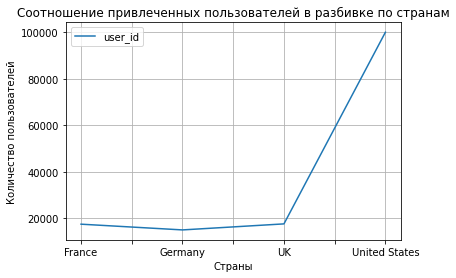

In [39]:
profiles.groupby('region').agg({'user_id': 'nunique'}).plot(grid=True);
plt.title('Соотношение привлеченных пользователей в разбивке по странам')
plt.xlabel('Страны');
plt.ylabel('Количество пользователей');

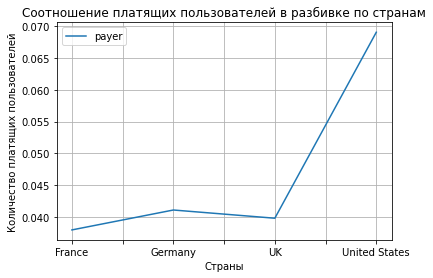

In [40]:
profiles.groupby('region').agg({'payer': 'mean'}).plot(grid=True);
plt.title('Соотношение платящих пользователей в разбивке по странам')
plt.xlabel('Страны');
plt.ylabel('Количество платящих пользователей');

Вывод: Большая часть пользователей приходится на США, на втором месте находится Великобритания, рядом с ней Франция, а на последнем Германия. При этом из привлеченных пользователей в среднем в платящих в процентном соотношении больше становятся пользователи из США, потом уже Германии, Великобритании и на последнем месте находится Франция.

#### Пользователи и девайсы

In [41]:
print(profiles.groupby('device').agg({'user_id': 'nunique', 'payer': 'mean'}).sort_values(by='payer', ascending=False))

         user_id     payer
device                    
Mac        30042  0.063644
iPhone     54479  0.062079
Android    35032  0.058518
PC         30455  0.050468


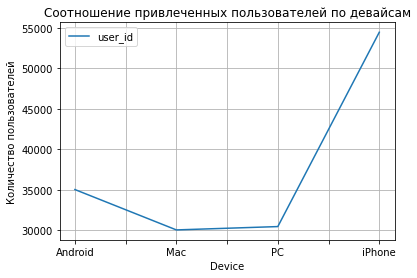

In [42]:
profiles.groupby('device').agg({'user_id': 'nunique'}).plot(grid=True);
plt.title('Соотношение привлеченных пользователей по девайсам')
plt.xlabel('Device');
plt.ylabel('Количество пользователей');

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Здорово, что визуализируешь полученные данные. Это важный навык для аналитика. Развивай его!)
</div>

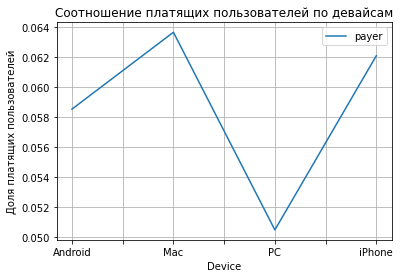

In [43]:
profiles.groupby('device').agg({'payer': 'mean'}).plot(grid=True);
plt.title('Соотношение платящих пользователей по девайсам')
plt.xlabel('Device');
plt.ylabel('Доля платящих пользователей');

Вывод: по графикам мы можем увидеть, что больше всего привлеченных пользователей приходятся на девайс - Iphone. PC, MAC, Android примерно на одном уровне. НО при этом доля платящих пользователей больше всего на девайсе - MAC, за ним идет Iphone, Android, PC на последнем месте.

#### Пользователи и рекламные источники

In [44]:
print(profiles.groupby('channel').agg({'user_id': 'nunique', 'payer': 'mean'}).sort_values(by='payer', ascending=False)) 

                    user_id     payer
channel                              
FaceBoom              29144  0.122049
AdNonSense             3880  0.113402
lambdaMediaAds         2149  0.104700
TipTop                19561  0.096007
RocketSuperAds         4448  0.079137
WahooNetBanner         8553  0.052964
YRabbit                4312  0.038265
MediaTornado           4364  0.035747
LeapBob                8553  0.030633
OppleCreativeMedia     8605  0.027077
organic               56439  0.020553


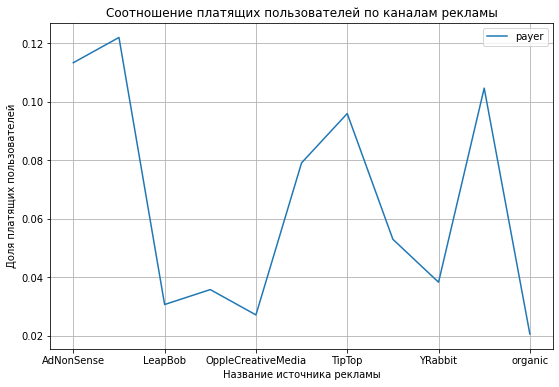

In [45]:
profiles.groupby('channel').agg({'payer': 'mean'}).plot(grid=True, figsize=(9,6));
plt.title('Соотношение платящих пользователей по каналам рекламы')
plt.xlabel('Название источника рекламы');
plt.ylabel('Доля платящих пользователей');

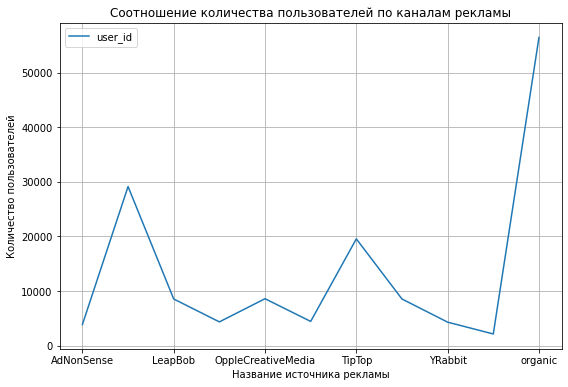

In [46]:
profiles.groupby('channel').agg({'user_id': 'nunique'}).plot(grid=True, figsize=(9,6));
plt.title('Соотношение количества пользователей по каналам рекламы')
plt.xlabel('Название источника рекламы');
plt.ylabel('Количество пользователей');

Вывод: По количеству привлеченных пользователей лидирует органический трафик, далее идет FACEBOOM, TipTip. Однако по этим же каналам привлечения доля платящих пользователей больше FaceBoom, AdNonSense, lambdaMediaAds, TipTop, RocketSuperAds, WahooNetBanner. Остальные каналы находятся примерно на одинаковом уровне по доле платящих пользователей, даже из бесплатного источника - Organic есть пользователи, которые что-то приобретают.               

# Общий вывод по исследовательскому анализу

После исследовательского анализа мы видим, что большая часть пользователей приходится из США, а Франция и Великобритания находятся примерно на одном уровне, а Германия на последнем. При этом пользователей из США в 2 раза больше, чем если взять всех пользователей из других стран вместе. В платящих пользователей приходится тоже больше на США, потом уже идет Германия, за ней Великобритания, Франция на последнем месте. Думаю это связано с уровнем дохода. Если разбивать пользователей по девайсам, то больше всего людей приходят со смартфонов: в первую очередь Iphone, потом Android. Mac и PC примерно на одном уровне в 30к пользователей каждый. Больше всего платящих пользователей используют Mac и Iphone.
Касательно рекламных каналов больше всего пользователей конечно приходят бесплатно - органическим путем. Но они конвертятся в платщих меньше всего. Зато те пользователе которые пришли с платных источников, конвертятся лучше. Лидерами являются: FaceBoom, AdNonSense, lambdaMediaAds, TipTop, RocketSuperAds, WahooNetBanner по доле платящих пользователей. Учитывая все эти факторы нужно только разобраться окупаются ли эти источники пользователей, даже учитывая их хорошую конвертацию.

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Расчёт верный. Но нету общего вывода по разделу. Поправишь, пожалуйста, этот момент во всем проекте, чтобы дальше не акцентировать на этом внимаение?
</div>

<div class="alert alert-info"> <b>Комментарии студента:</b>
    Добавил </div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__


В целом в данном разделе был проведен хороший анализ данных - мы посмотрели на базовые значения конверсии пользователей в покупатели по регионам, устройствам и каналу привлечения, определили основной рынок. Получается, что больше всего приходит пользователей из США и они лучше других конвертируется. При этом большая часть пользователей заходит с мобильных устройств, это тоже стоит отметить. Также, мы можем сказать, что наибольшую конверсию имеют пользователи, которые пользуются Mac, а затем следуют пользователи iPhone, т.е. мы можем сказать, что в целом пользователи Apple имеют лучшую конверсию в покупателей. Возможно, тут есть плюсы ApplePay.

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

#### Общая сумма расходов на маркетинг

In [47]:
total_costs=round(ad_costs['costs'].sum())
print(total_costs)

105497


<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

        
Здорово, что округлил

#### Распределение бюджета по рекламным каналам

In [48]:
print(ad_costs.groupby('channel').agg({'costs': 'sum'}).sort_values(by='costs', ascending=False)) 

                       costs
channel                     
TipTop              54751.30
FaceBoom            32445.60
WahooNetBanner       5151.00
AdNonSense           3911.25
OppleCreativeMedia   2151.25
RocketSuperAds       1833.00
LeapBob              1797.60
lambdaMediaAds       1557.60
MediaTornado          954.48
YRabbit               944.22


Вывод: по данному срезу мы видим, что от общей суммыв 105497$ более 80 процентов ушло на 2 рекламных канала: TipTop, FaceBoom. На остальные источники приходится от 1 до 5 процентов от общего бюджета на рекламу. 

#### Временное распределение затрат по рекламным каналам

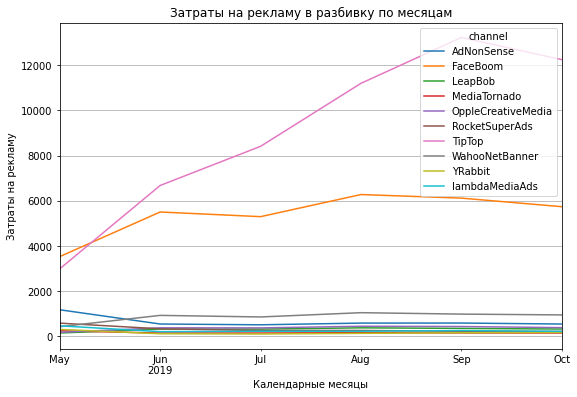

In [49]:
ad_costs['Месячные расходы']=ad_costs['dt'].astype('datetime64[M]')
ad_costs.pivot_table(index='Месячные расходы', columns='channel', values='costs', aggfunc='sum').plot(figsize=(9,6), grid=True);
plt.title('Затраты на рекламу в разбивку по месяцам');
plt.xlabel('Календарные месяцы');
plt.ylabel('Затраты на рекламу');

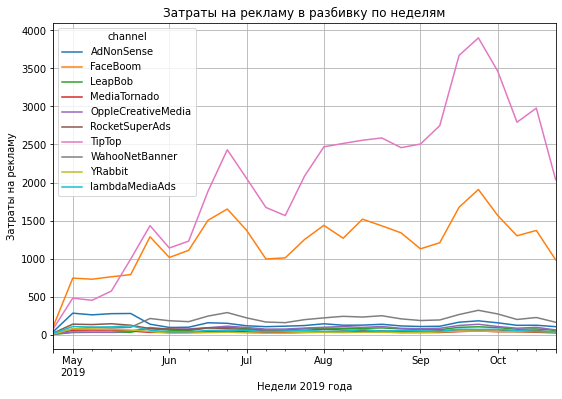

In [50]:
ad_costs['Недельные расходы']=ad_costs['dt'].astype('datetime64[W]')
ad_costs.pivot_table(index='Недельные расходы', columns='channel', values='costs', aggfunc='sum').plot(figsize=(9,6), grid=True);
plt.title('Затраты на рекламу в разбивку по неделям');
plt.xlabel('Недели 2019 года');
plt.ylabel('Затраты на рекламу');

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Графики верны, но отсутствует их оформление (заголовки + подписи осей). Поправь, пожалуйста, этот момент во всем проекте. Чтобы дальше на этом не акцентировать внимание
</div>

<div class="alert alert-info"> <b>Комментарии студента:</b>
    Добавил </div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Отличный и наглядный график 👍
    
Здорово, когда он подписан. Так быстрее понять о чем идёт речь на нём.
    
</div>

#### Средняя стоимость привлечения пользователей

In [51]:
print(profiles.groupby('channel').agg({'acquisition_cost':'mean'}).sort_values(by='acquisition_cost', ascending=False))

                    acquisition_cost
channel                             
TipTop                      2.799003
FaceBoom                    1.113286
AdNonSense                  1.008054
lambdaMediaAds              0.724802
WahooNetBanner              0.602245
RocketSuperAds              0.412095
OppleCreativeMedia          0.250000
YRabbit                     0.218975
MediaTornado                0.218717
LeapBob                     0.210172
organic                     0.000000


<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Неплохо бы посчитать средний САС по проекту
</div>

<div class="alert alert-info"> <b>Комментарии студента:</b>
    Рассчитал снизу </div>

In [52]:
average_cac=ad_costs['costs'].sum()/profiles_payer['user_id'].sum()
average_cac

0.703277825182657

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Отличный инсайд для заказчика)
    
</div>

Вывод: Учитывая что TipTop находится лишь только на 4-м месте по доле платящих клиентов. Стоимость привлечения уникальных клиентов
через этот ресурс неоправдано дорогая. Практически 3-х кратная разница между TipTop и FaceBoom, когда FaceBoom стоит всего 1,11 за 
привлеченного клиента и является лидиром по доле платящих клиентов. Что-то явно не так.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Наиболее дорогостоящим каналом привлечения пользователей является TipTop, однако количество и доля платящих пользователей, приходящих с этого источника, не так высоки. Это можно объяснить молодой аудиторией TipTop'a и, соответственно, не очень высокой их платежеспособностью.
    
</div>

# Общий вывод по резделу маркетинга

Как мы видим из графиков распределения затрат по месяцам и неделям. С течением времени все больше и больше средств компания вкладывает в TipTop и FaceBoom, когда как в остальные рекламные источники вкладывают примерно одни и те же средства, что и в начале. Общий бюджет затрат на рекламу за изучаемый период - 105497$. Из него 80 процентов уходит на TipTop и FaceBoom - это ненормально. Тем более, что привлечение пользователя на ресурсе TipTop стоит кратно выше, чем на других ресурсах. Средний САС по нашему проекту = 0.70 долларов .

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

#### Анализ окупаемости рекламы

In [53]:
profiles1=profiles[profiles['channel']!='organic']

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Совершенно верно, поскольку мы за них ничего не платим,  а нам нужно изучить именно окупаемость рекламы. 
</div>

Поскольку органические пользователи приходят бесплатно, я считаю, что их можно удалить из последующего анализа.

In [54]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14 

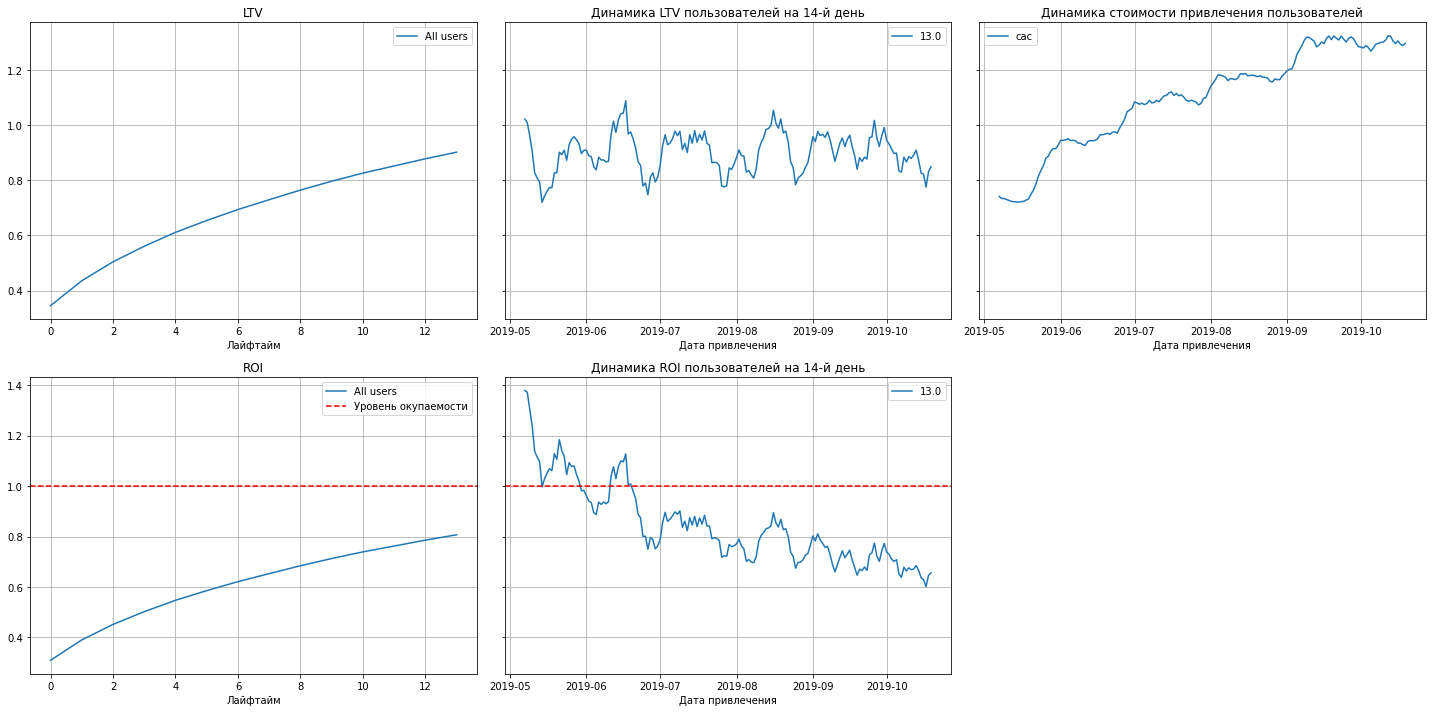

In [55]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles1, orders, observation_date, horizon_days)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__
    
Поправь, пожалуйста, описание динамики изменения стоимости привлечения пользователей по каналам, устройствам и странам, когда будет проведена фильтрация органических пользователей (выше сделал срез, а в исследовании используешь не `profiles1`, а `profiles`

<div class="alert alert-info"> <b>Комментарии студента:</b>
    Исправил </div>

Вывод: Как мы видим, изначально компания зарабатывала больше денег посредством привлечения клиентов через рекламу. Потому это стало убыточным для организации, поскольку затраты на привлечения клиентов сильно выросли.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__
    
Логика анализа верная, согласен с выводом. Наблюдаем, что динамика ROI за лайфтайм падает. При относительно стабильной динамике LTV, динамика САС растёт с мая по конец октября. Эту закономерность мы наблюдаем в динамике ROI, что при сильном увеличении САС, в равной степени падает динамика ROI пользователей.
</div>


#### Проверки пользователей

##### Проверка удержания пользователей

In [56]:
retention_raw, retention, retention_history = get_retention(
    profiles1, sessions, datetime(2019, 11, 1).date(), 14)

print(retention)  # таблица удержания
print()
print(retention_history)  # таблица динамики удержания 

       cohort_size    0         1         2         3         4         5  \
payer                                                                       
False        81334  1.0  0.176876  0.086594  0.051823  0.033504  0.024701   
True          7310  1.0  0.380985  0.293023  0.235568  0.210260  0.191245   

              6         7         8         9        10        11        12  \
payer                                                                         
False  0.018651  0.014188  0.011729  0.009541  0.007488  0.006393  0.006012   
True   0.166758  0.156908  0.145144  0.136389  0.135021  0.121888  0.118741   

             13  
payer            
False  0.004709  
True   0.104925  

                  cohort_size    0         1         2         3         4  \
payer dt                                                                     
False 2019-05-01          358  1.0  0.212291  0.072626  0.061453  0.022346   
      2019-05-02          300  1.0  0.196667  0.103333  0.033333  0

In [57]:
# сумма размеров когорт равна числу новых клиентов в изучаемый период?

report = profiles1.query(
     # в профилях находим пользователей, привлечённых с 1 мая по 19 октября
    'datetime(2019, 5, 1).date() <= dt <= datetime(2019, 10, 19).date()'
)
print(
    # считаем уникальных пользователей в профилях и складываем размеры когорт
    'Общее количество новых пользователей: {} {}'.format(
        len(report['user_id'].unique()), retention['cohort_size'].sum()
    )
)

# сумма размеров платящих когорт равна числу покупателей в изучаемый период?

report = profiles1.query(
    # в профилях находим платящих пользователей, привлечённых с 1 мая по 19 октября
    'datetime(2019, 5, 1).date() <= dt <= datetime(2019, 10, 19).date() and payer == True'
)
print(
    # считаем уникальных платящих пользователей в профилях 
    # и складываем размеры платящих когорт
    'Общее количество новых покупателей: {} {}'.format(
        len(report['user_id'].unique()),
        retention.query('payer == True')['cohort_size'].sum(),
    )  
) 

Общее количество новых пользователей: 88644 88644
Общее количество новых покупателей: 7310 7310


Вывод: Данные сходятся — первые две проверки пройдены.

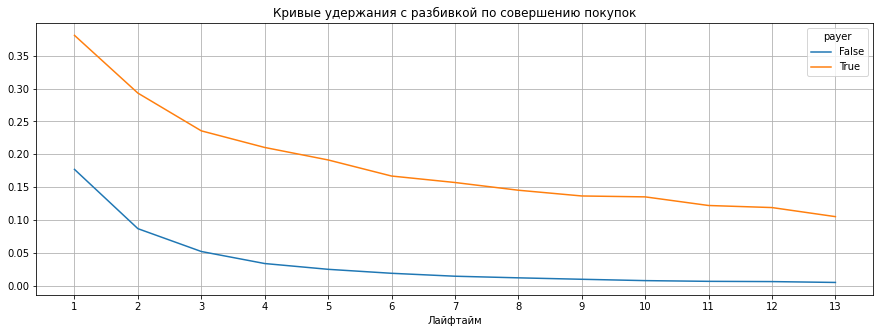

In [58]:
# строим кривые удержания

report = retention.drop(columns=['cohort_size', 0])
report.T.plot(grid=True, xticks=list(report.columns.values), figsize=(15, 5))
plt.xlabel('Лайфтайм')
plt.title('Кривые удержания с разбивкой по совершению покупок')
plt.show() 

Вывод: Кривая удержания платящих пользователей выше, чем неплатящих, обе кривые постепенно снижаются. Все в порядке.

##### Проверка конверсии пользователей

In [59]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles1, orders, datetime(2019, 11, 1).date(), 14
)

print(conversion)  # таблица конверсии
print()
print(conversion_history)  # таблица динамики конверсии 

           cohort_size       0.0       1.0       2.0       3.0     4.0  \
cohort                                                                   
All users        88644  0.058752  0.066321  0.069999  0.072571  0.0745   

                5.0       6.0       7.0       8.0       9.0      10.0  \
cohort                                                                  
All users  0.075775  0.076745  0.077591  0.078291  0.078945  0.079362   

               11.0      12.0      13.0  
cohort                                   
All users  0.079678  0.079904  0.080197  

            cohort_size       0.0       1.0       2.0       3.0       4.0  \
dt                                                                          
2019-05-01          390  0.058974  0.066667  0.071795  0.071795  0.076923   
2019-05-02          323  0.058824  0.068111  0.068111  0.068111  0.068111   
2019-05-03          346  0.057803  0.069364  0.075145  0.078035  0.083815   
2019-05-04          457  0.070022  0.074398  

In [60]:
# сумма размеров когорт равна числу новых клиентов в изучаемый период?

report = profiles1.query(
    # в профилях находим пользователей, привлечённых с 1 по 19 октября
    'datetime(2019, 5, 1).date() <= dt <= datetime(2019, 10, 19).date()'
)
print(
    # считаем уникальных пользователей в профилях и складываем размеры когорт
    'Общее количество новых пользователей: {} {}'.format(
        len(report['user_id'].unique()), conversion['cohort_size'].sum()
    )
) 

Общее количество новых пользователей: 88644 88644


Вывод: Количество пользователей совпадает — здесь проблем нет.

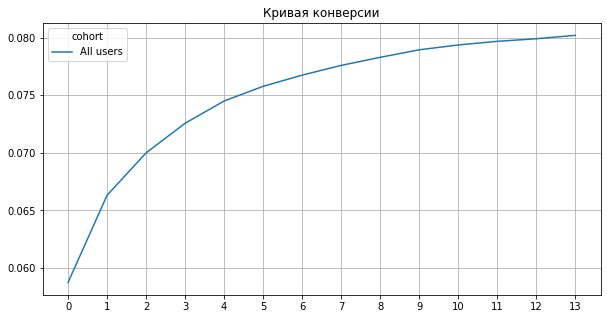

In [61]:
report = conversion.drop(columns=['cohort_size'])
report.T.plot(grid=True, xticks=list(report.columns.values), figsize=(10, 5))
plt.title('Кривая конверсии')
plt.show() 

Вывод: кривая конверсии выглядит нормально.

In [62]:
print(conversion[conversion > 1].fillna('')) 

           cohort_size 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0  \
cohort                                                                          
All users        88644                                                          

          13.0  
cohort          
All users       


In [63]:
print(conversion_history[conversion_history > 1].fillna('')) 

            cohort_size 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0  \
dt                                                                          
2019-05-01          390                                                     
2019-05-02          323                                                     
2019-05-03          346                                                     
2019-05-04          457                                                     
2019-05-05          438                                                     
...                 ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...   
2019-10-15          442                                                     
2019-10-16          436                                                     
2019-10-17          449                                                     
2019-10-18          591                                                     
2019-10-19          588                                                     

In [64]:
# рассчитываем число покупателей по данным из таблицы конверсии

print(
    'Количество уникальных покупателей из таблицы конверсии: {:.0f}'.format(
        conversion['cohort_size'][0] * conversion[6][0]
    )
) 

Количество уникальных покупателей из таблицы конверсии: 6803


In [65]:
# рассчитываем число покупателей по данным о покупках

# берём данные пользователей, привлечённых между 1 и 19 октября 
report = orders.merge(
    profiles1.query(
        'datetime(2019, 5, 1).date() <= dt <= datetime(2019, 10, 19).date()'
    ),
    on='user_id',
)
# рассчитываем лайфтайм для каждой покупки
report['lifetime'] = (report['event_dt'] - report['first_ts']).dt.days
# исключаем лишние лайфтаймы
report = report.query('lifetime <= 6')

print(
    'Количество уникальных покупателей из таблицы заказов: {:.0f}'.format(
        len(report['user_id'].unique())
    )
) 

Количество уникальных покупателей из таблицы заказов: 6803


Вывод: количество уникальных покупателей, рассчитанное двумя способами совпадает. Другие тесты пройдены. Соответственно расчет сделан без ошибок.

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Немного не так. Код для расчёта конверсии и удержания можно взять из тренажера: Юнит экономика - Разбор кейса
</div>

<div class="alert alert-info"> <b>Комментарии студента:</b>
    Я не понял, что не так. profiles я заменил на profiles1. Итоговые цифры расчетов изменились, но равны друг другу. Код для расчета конверсии и удержания я и так изначально взял из тренажера: Юнит экономика - Разбор кейса. </div>

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №2__

Даниил, смотри: неже вывел код для подсчёта конверсии и удержания пользователей (без разбивки по метрикам). В конце раздела, покажу, как сделать с разбивкой. Добавь, пожалуйста, выводы
</div>

<div class="alert alert-info"> <b>Комментарии студента:</b>
    Выводы добавил</div>

In [ ]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Вывод: Кривая конверсии всех пользователей выглядит нормально. Чем больше человек пользуется приложением, тем больше вероятность того, что он в будущем станет платящим пользователем. Динамика конверсии на 14-й день в целом сильно не менялась в течение нескольких месяцев. Можно выделить Май и Июнь месяц.

In [ ]:
# считаем удержание пользователей
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, sessions, observation_date, horizon_days)

# строим графики удержания с разбивкой на платящих и неплатящих пользователей
plot_retention(retention_grouped, retention_history, horizon_days)

Вывод: Кривые удержания платящих и неплатящих пользователей выглядят нормально. Но динамика удержания именно платящих пользователей сильно просядает в конце Октября месяца(исследумоего периода).

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №3__

Хорошо, анализ конверсии и удержания корректен

#### Анализ окупаемости рекламы с разбивкой по устройствам

In [ ]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles1, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

In [ ]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

In [ ]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, sessions, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Вывод: как мы видим по всем девайсам LTV примерно одинаковый. Лучше всего конвертятся пользователи Mac, Iphone. Но из-за сильно увеличевшийся стоимости привлечения пользователей Mac, Iphone, Android лишь только пользователи PC являются прибыльными. Хотя после нескольких месяцев и пользователи PC показывают плохую динамику. Динамика удержания за все время сильно не изменилась

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

С окупаемостью проблемы по всем устройствам кроме PC. Это значит, что у нас, по крайней мере, нет технических проблем, влияющих на монетизацию;
</div>

#### Анализ окупаемости рекламы с разбивкой по странам

In [ ]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles1, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

In [ ]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

In [ ]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, sessions, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Вывод: мы видим, что по всем странам LTV примерно одинаковый. Выделяется только США, у пользователей из этой страны LTV немного больше. Конвертятся пользователей из США тоже лучше остальных, а вот удержать этих пользователей сложнее, чем других. Также стоимость привлечения клиентов в этой стране кратно больше, чем в других регионах. Поэтому показатель ROI показывает, что убытки мы наблюдаем именно от пользователей из США. Получается, что в США не только тяжело приобрести нового клиента, но и удердать его в приложении тоже является проблемой.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Все верно. Нужно разбираться детальнее с рекламой в США, тем более, что это наш основной рынок. 

#### Анализ окупаемости рекламы с разбивкой по каналам привлечения

In [ ]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles1, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

In [ ]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

In [ ]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, sessions, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Вывод: По рекламным источникам мы можем наблюдать, что LTV TipTop и lambdaMediaAds значительно выше других источников. При этом стоимость привлечение юзера из TipTop очень сильно выросла, а у всех других источников осталось +- на том же уровне. FaceBoom вообще не показывает изменений в цене, но тоже является одним из самых дорогих. И как мы видим по показателю ROI источники, которые приносят платежных клиентов с большей долей являются убыточными(TipTop, FaceBoom, AdNonSense). Скорее всего, проблема TipTop заключается в его дороговизне в плане привлечения клиентов, а с FaceBoom и AdNonSense можно явно заметить, что кривые удержание клиентов, который пришли с этих платформ достаточно сильно отстают от остальных рекламных каналов. Из-за этого их показатель ROI убыточен, у них хорошая конвертация "юзеров" в платящих пользователей, но плохое удержание клиентов в приложении - видимо люди, которые приходят через эти траффики имееют достаток, но не сильно заинтересованы в нашем продукте.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__
    
Да, действительно, есть проблемы с каналом TipTop, видим значительный рост затрат на привлечение.
</div>

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Лучше после каждого раздела, графика (или серии тестов) писать вывод по полученным данным с учетом поставленной бизнес задачи - так проще читать проект, поскольку будущим коллегам или заказчику не надо будет самим интерпретировать результаты каждого раздела, теста или графика.
</div>

<div class="alert alert-info"> <b>Комментарии студента:</b>
    Добавил </div>

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Анализ не полный, т.к. проблемы могут быть в удержании каналов/стран/устройств/, а без анализа конверсии и удержания, мы не сможем дать рекомендации маркетологам.
</div>

<div class="alert alert-info"> <b>Комментарии студента:</b>
    Наверное, я не понимаю, что от меня требуется. Я строил таблицы динамики конверсии и удержания в пункте 5.2 , проверил их. </div>

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №2__
    
    
Даниил, в тренажере имеется код для расчёта конверсии и удержания для девайсов. Его можно использовать, чтобы в нашем проекте рассмотреть конверсию и удержание для стран / каналов / устройств. Бгодаря этим данным, мы можем оценить, какие источники хорошо себя показывают, а какие хуже. Поправь, пожалуйста

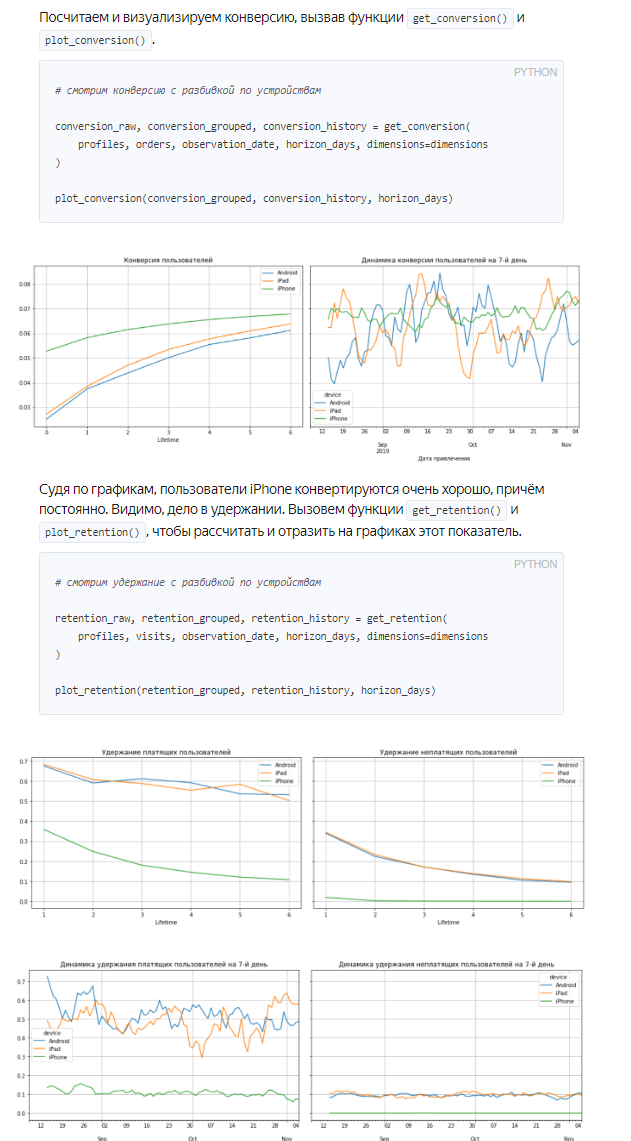
</div>

<div class="alert alert-info"> <b>Комментарии студента:</b>
    Добавил </div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №3__

Хорошо, анализ конверсии и удержания корректен, согласен с интерпретацией результатов. Проблемные источники определены верно.

#### Расчет окупаемости рекламы в целом

In [ ]:
#total_revenue=orders['revenue'].sum()

In [ ]:
#print(total_revenue-total_costs)

In [ ]:
orders1=orders.merge(profiles[['channel','user_id']], on='user_id', how='left')

In [ ]:
orders1=orders1[orders1['channel'] != 'organic']
total_revenue1=orders1['revenue'].sum()
print(total_revenue1 - total_costs)

<div class="alert alert-info"> <b>Комментарии студента:</b>
    Исправил расчет окупаемости в целом, удалив покупки органического трафика. Мне кажется так правильно будет </div>

Вывод: 

Да, как мы видим из пункта 5.6 - в целом реклама окупается.

Негативное влияние на рекламную кампанию приложения в целом оказывают следующие страны: США
Стоимость привлечения клиента в этой стране за несколько месяцев стала очень большой.
Негативное влияние на рекламную кампанию приложения в целом оказывают следующие девайсы: Iphone, Mac
Стоимость привлечения клиента, использующих Mac, Iphone значительно выросла. Гораздо сильнее чем стоимость привлечения пользователей Android и PC.
Негативное влияние на рекламную кампанию приложения в целом оказывают следующие каналы привлечения: FaceBoom, TipTop, Adnonsense
На удивление данные источники рекламы являются фаворитами по доле платящих людей, НО являются очень дорогими относительно других рекламных каналов.

Проблемы окупаемости связаны в первую очередь с кратным увеличинием стоимости привлечения клиента в достаточно короткий срок (несколько месяцев). Также естественно неправильное распределение бюджета по странам происхождения, каналам привлечения, девайсам использования клиента.

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

Главной целью данного проекта был анализ рекламных кампаний приложения и поиск рекоммендация для вывода компании в плюс.

Мною были извлечены данные, в последствии обработаны. Построены функции для расчета и анализа LTV, ROI, удержания и конверсии.
Также я осуществил исследовательский анализ данных, анализ маркетинга и оценка окупаемости рекламы как в целом, так и в разбивке по различным категориям.

В целом мы ранее посчитали на данный момент привлеченный клиенты приносят больше денег, чем уходит на их привлечение. Но у нашего приложения есть потенциальная возможность значительно увеличить свою прибыль. Во-первых, нужно отметить тот факт, что на данный момент не целесообразно работать с клиентами из США. Их привлечение стоит слишком дорого и по итогу данные клиенты не окупаются. Во-вторых, нужно обратить внимание на девайсы, используемые пользователями. Несмотря на то что пользователи Mac и Iphone чаще производят оплату внутри приложения, стоимость их привлечения тоже достаточно велика. Поэтому стоит сконцентрироваться на "юзерах", которые используеют Android и PC.  
Чтобы увеличить нашу прибыль мы должны ориентироваться на пользователей Android и PC из следующих стран: Франция, Германия, Великобритания. Касательно рекламных каналов моя рекомендация:протестировать их на коротком промежутке времени с учетом выбранных девайсов и стран пользователей и в последствии распределить следующий рекламный бюджет в зависимости от их окупаемости. 
Также нужно провести работу по имеющимся рекламным источникам - отказаться от ресурсов TipTop, FaceBoom, Adnonsense, поскольку привлекаемые клиенты через эти каналы по итогу не окупаются. 
Альтернативные каналы на которые стоит обратить внимание: Yrabbit, MediaTornado, lambdaMediaAds, RocketSuperAds. 
Данные каналы показывают хорошую динамику удержания и конверсии. Их ROI находится на приемлимом уровне. Инвестируя в рекламу по этим каналам мы можем значительно увеличить прибыль компании. Советую также выделить ограниченный бюджет на остальные источники, промониторить динамику в течение двух недель, поскольку при сузившемся выборе потенциальных клиентов - возможно ROI остальных рекламных каналов станет выше уровня окупаемости.

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__
        
Шикарный вывод, молодец, что в итоговом выводе сформулировал рекомендации для отдела маркетинга. Давай напишем про каналы, от которых стоит отказаться. Давай предложти альтернативные каналы, по которому показатели конверсии, удержания и ROI на приемлемом уровне. Как думаешь, а канал `Yrabbit` подойдет?

<div class="alert alert-info"> <b>Комментарии студента:</b>
    Скорректировал </div>

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №2__

Отлично, давай теперь посмотрим на конверсию и удержание. И возможно пересмотрим выводы?
</div>

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №3__
        
Я бы не рекомендовал вкладываться в канал `Yrabbit`. Почему я так думаю: да, канал сейчас окупается, потому что там низкий CAC. Фактически мы сейчас сильно много не платим за новых клиентов (CAC = 0,21) . И уже на этих клиентах (которые обошлись нам недорого) мы сможем спрогнозировать будущую картину. Они имеют низкую конвертируемость и сильно падающее удержание на последних днях горизонта. Т.е. можно сделать вывод, что им не интересно наше приложение. Возможно, это просто не наша аудитория. Они не заинтересованы в нашем приложении

<div class="alert alert-block alert-warning">📝
Комментарий от ревьюера №1 </b> 



У тебя получилась очень сильная и хорошая работа. Здорово, что расчеты ты сопровождаешь иллюстрациями, а так же не забываешь про комментарии, твой проект интересно проверять. 

---

Нужно поправить:

1) Оформление графиков

2) После каждого раздела / графика (или серии тестов) писать вывод по полученным данным с учетом поставленной бизнес задачи

3) Из расчетов нам следует исключить пользователей с органическим трафиком

4) Конверсия и удержание по метрикам (страны / каналы / девайсы) (расчёт взять из тренажера)

5) Финальный вывод

6) Подправить выводы, после изменений

----


Если у тебя будут какие-то вопросы по моим комментариям - обязательно пиши! Буду ждать работу на повторное ревью :)</div>

<div class="alert alert-block alert-warning">📝
Комментарий от ревьюера №2 </b> 



Отличная работа. Осталось поправить пару моментов:

---

Нужно поправить:

1) Шаг 5.2 описать выводы по конверсии и удержанию для всех пользователей (без разбивки)

2) Конверсия и удержание по метрикам (страны / каналы / девайсы) (расчёт взять из тренажера)

3) Подправить выводы, после изменений

----


Если у тебя будут какие-то вопросы по моим комментариям - обязательно пиши! Буду ждать работу на повторное ревью :)</div>

<div style="border:solid blue 3px; padding: 20px">
<div class="alert alert-block alert-success">✔️
    

__Коментарий от ревьюера №3__

    
В остальном всё чудно😊. Твой проект так и просится на github =)   
    
Поздравляю с успешным завершением проекта 😊👍
И желаю успехов в новых работах 😊

---

От себя хочу порекомендовать тебе отличную книгу про язык Python. Она очень классная (можно купить как новую, так и на Авито попадается. Вот ссылка на pdf этой книги)
    
https://monster-book.com/avtomatizaciya-zadach-s-python
    